In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from display import plot_event, multiple_plots, show_densities, display_timeline
from problem import get_train_data
from problem import turn_prediction_to_event_list

In [63]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)
no_events = turn_prediction_to_event_list(labels_train == 0)

In [47]:
var_name = 'RmsBob'
df = data_train[[var_name]].copy()
df['label'] = labels_train.copy()

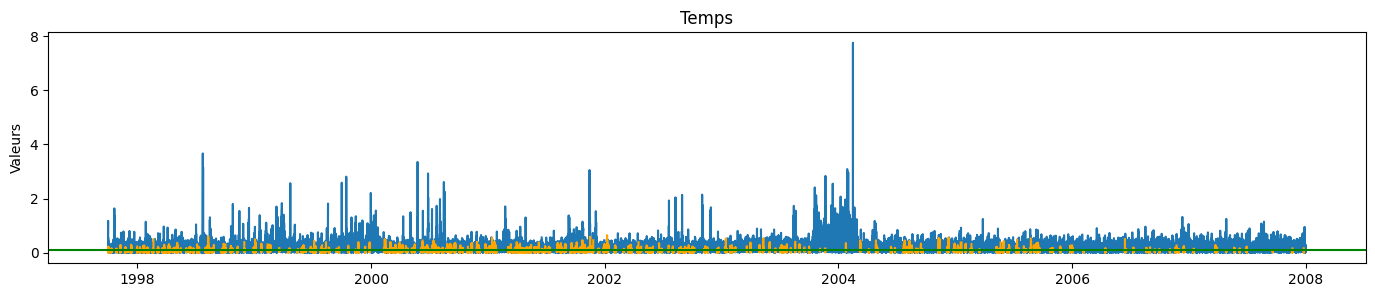

In [48]:
var_s = data_train[var_name]
display_timeline(var_s, labels_train)

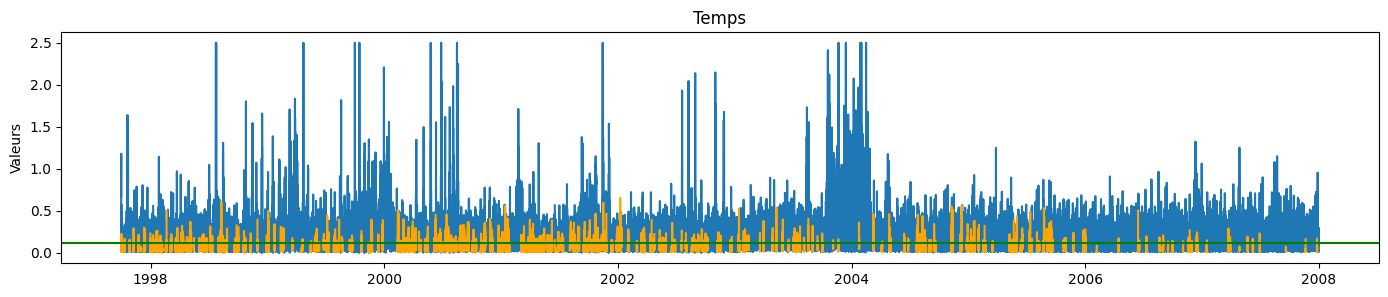

In [49]:
thresh_var_s = var_s.map(lambda x: min(x, 2.5))
display_timeline(thresh_var_s, labels_train)

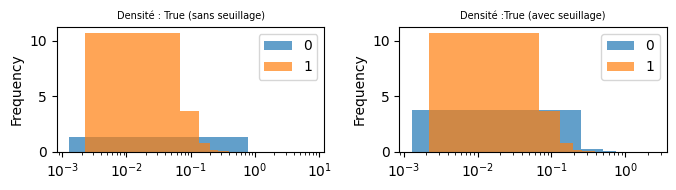

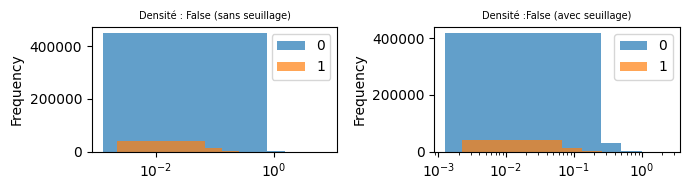

In [51]:
thresh_var_df = thresh_var_s.to_frame()
thresh_var_df['label'] = labels_train.copy()

show_densities(df, thresh_var_df)

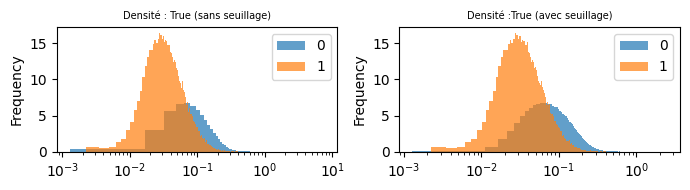

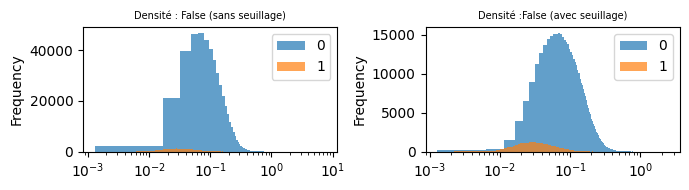

In [53]:
for density in [True, False]:
    _, ax = plt.subplots(ncols=2, figsize=(7, 2))
    ax[0].set_title("Densité : " + str(density) + " (sans seuillage)", fontsize=7)
    ax[1].set_title("Densité :" + str(density)+ " (avec seuillage)", fontsize=7)

    df.groupby(['label'])[var_name].plot(kind='hist', bins=500, alpha=0.7, ax=ax[0], legend=True, density=density, logx=True)
    thresh_var_df.groupby(['label'])[var_name].plot(kind='hist', bins=500, alpha=0.7, ax=ax[1], legend=True, density=density, logx=True,)
    plt.tight_layout()

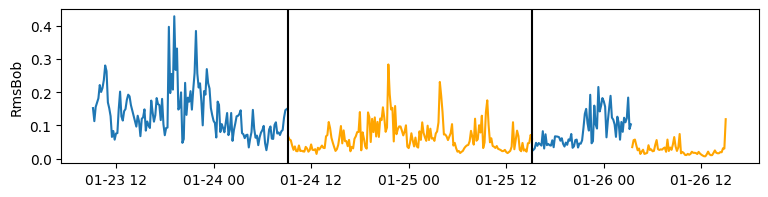

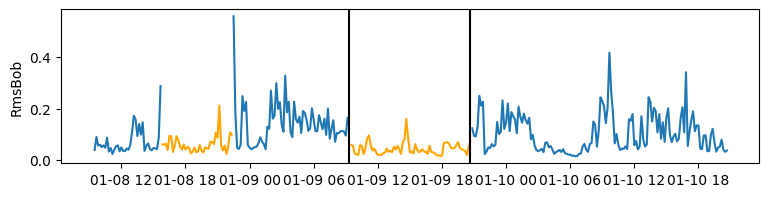

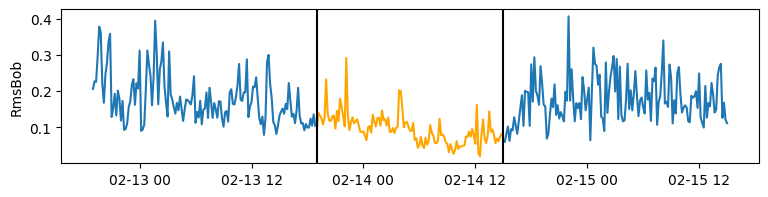

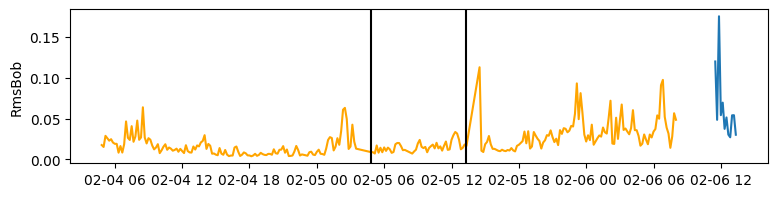

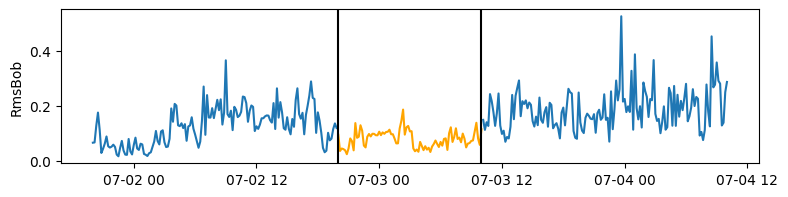

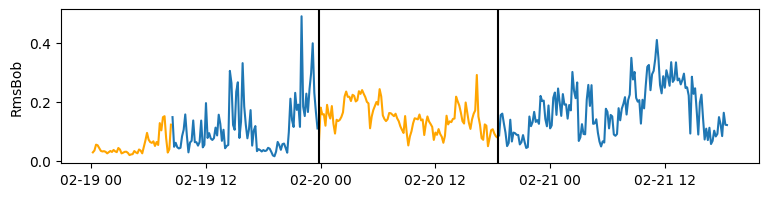

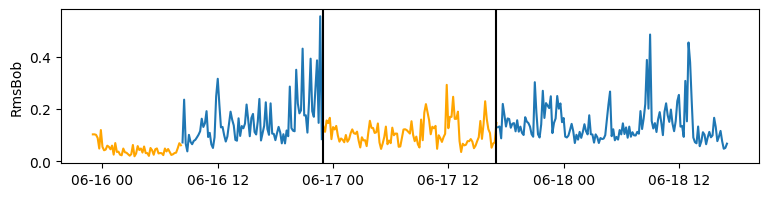

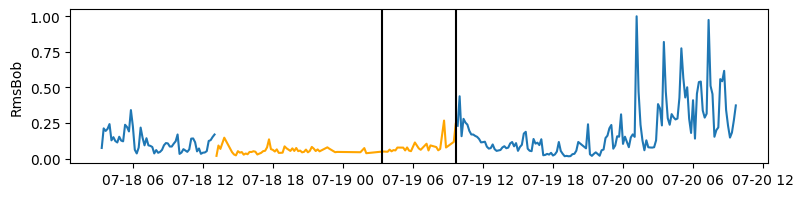

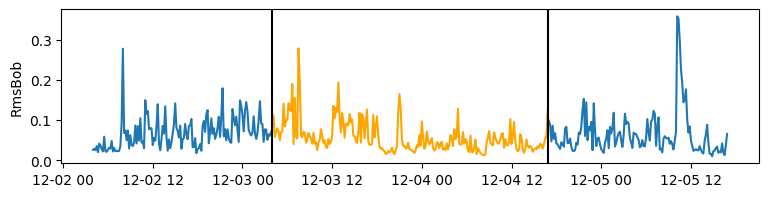

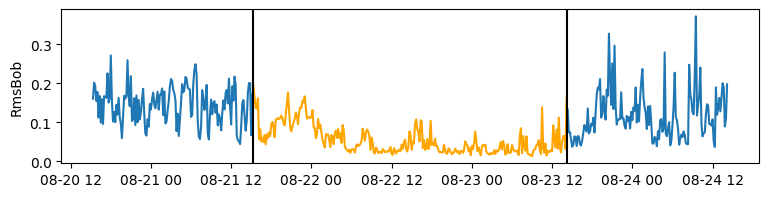

In [61]:
multiple_plots(
    thresh_var_s.to_frame(), 
    labels_train, 
    events=events,
    n_events=10,
    delta=24,
    figsize=(9, 2),
    random_state=2
    )

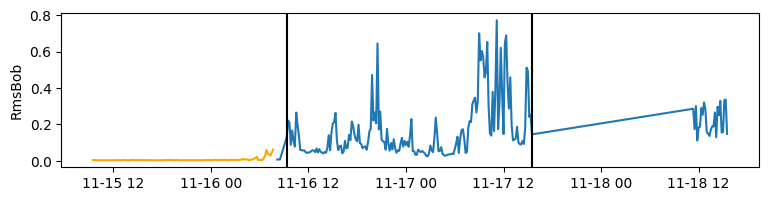

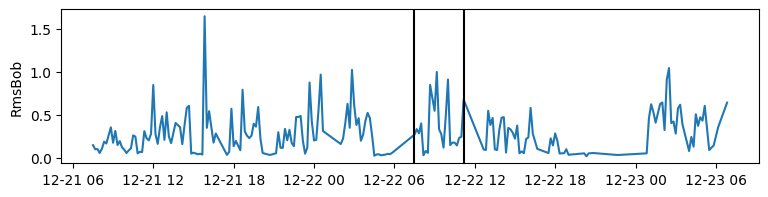

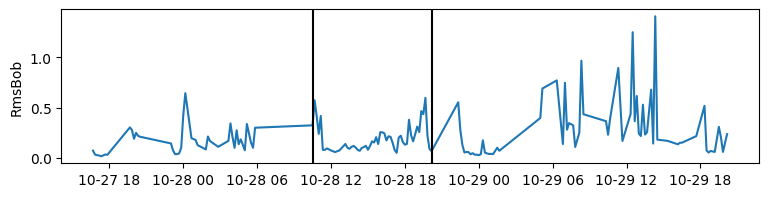

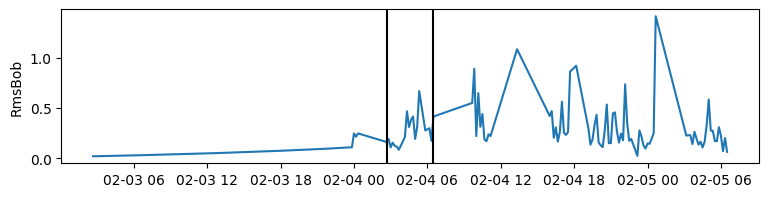

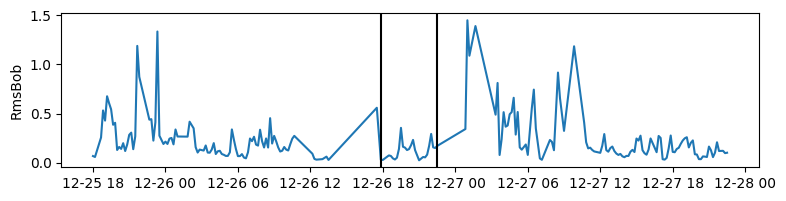

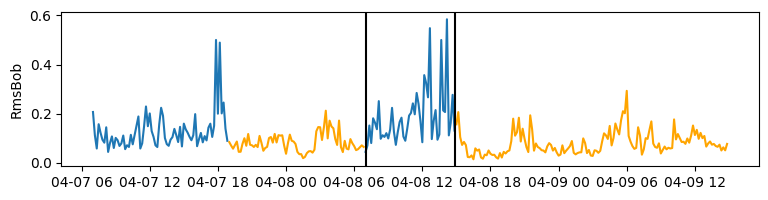

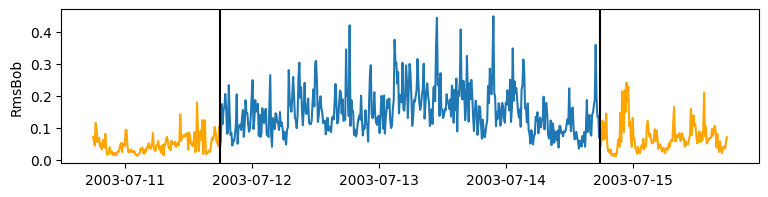

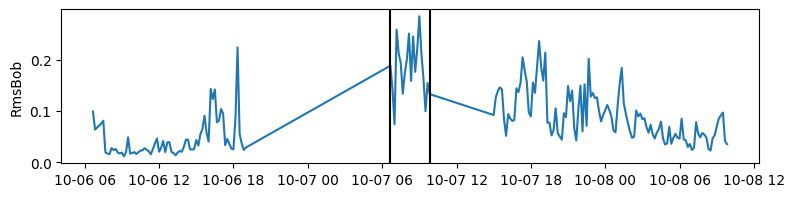

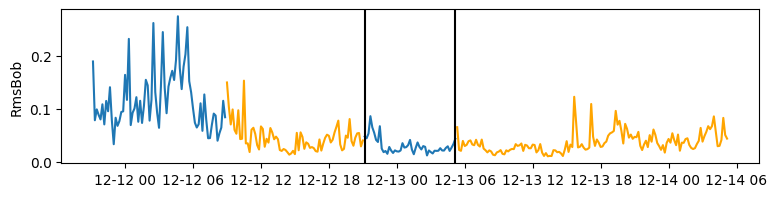

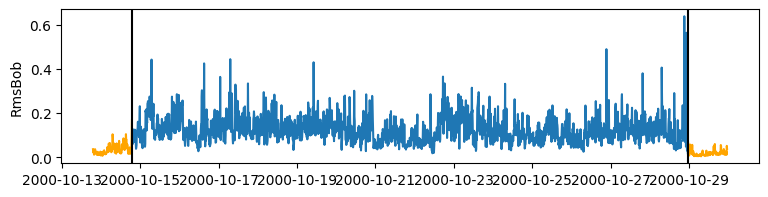

In [64]:
multiple_plots(
    thresh_var_s.to_frame(), 
    labels_train, 
    events=no_events,
    n_events=10,
    delta=24,
    figsize=(9, 2),
    random_state=2
    )

In [66]:
thresh_var_s[labels_train[labels_train == 0].index].describe()
# thresh_var_s.iloc[np.where(labels_train == 0)].describe()

count    451269.000000
mean          0.125459
std           0.097914
min           0.001278
25%           0.064373
50%           0.103823
75%           0.159176
max           2.500000
Name: RmsBob, dtype: float64

In [70]:
thresh_var_s.iloc[np.where(labels_train == 1)].describe()

count    58565.000000
mean         0.059906
std          0.046263
min          0.002231
25%          0.029693
50%          0.047068
75%          0.075351
max          0.652989
Name: RmsBob, dtype: float64

- Simplement indiquer la valeur moyenne de rms sur un pas de temps à fixer au modèle ?